In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("input"))

['train-images-idx3-ubyte', 't10k-labels-idx1-ubyte', 't10k-images-idx3-ubyte', 'train-labels-idx1-ubyte', 'fashion-mnist_test.csv', 'fashion-mnist_train.csv']


## Loading the Data Set

In [3]:
train = pd.read_csv("input/fashion-mnist_train.csv")
print(train.shape)

(60000, 785)


In [4]:
# let's look at first five train samples
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# let's look at first sample pixel values
train.iloc[0].value_counts()

0      306
213     21
207     20
210     20
208     17
      ... 
137      1
135      1
129      1
123      1
179      1
Name: 0, Length: 126, dtype: int64

In [6]:
# reading test dataset
test = pd.read_csv("input/fashion-mnist_test.csv")
print(test.shape)

(10000, 785)


In [7]:
# let's look at first five test samples
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# put labels into Y_train variable
Y_train = train["label"].values
# Drop 'label' column
X_train = train.drop(labels = ["label"], axis = 1)
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# put labels into Y_test variable
Y_test = test["label"].values
# Drop 'label' column
X_test = test.drop(labels = ["label"], axis = 1)
X_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


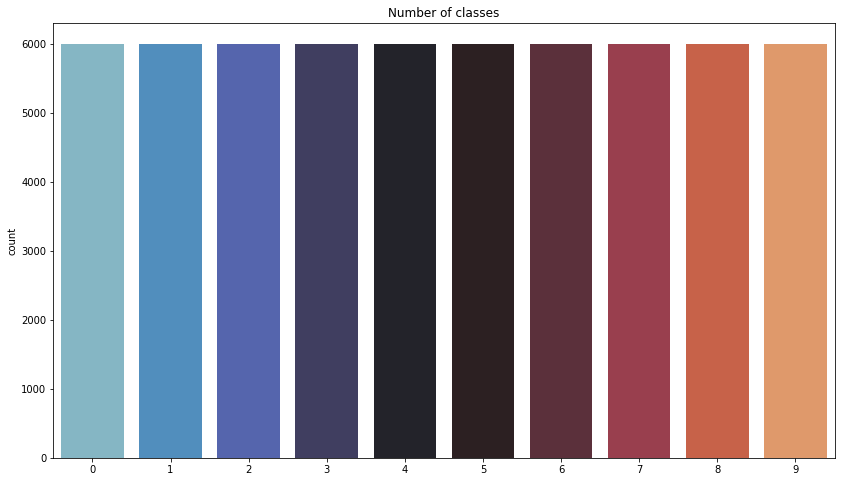

In [10]:
plt.figure(figsize=(14,8))
sns.countplot(Y_train, palette="icefire")
plt.title("Number of classes")
plt.show()

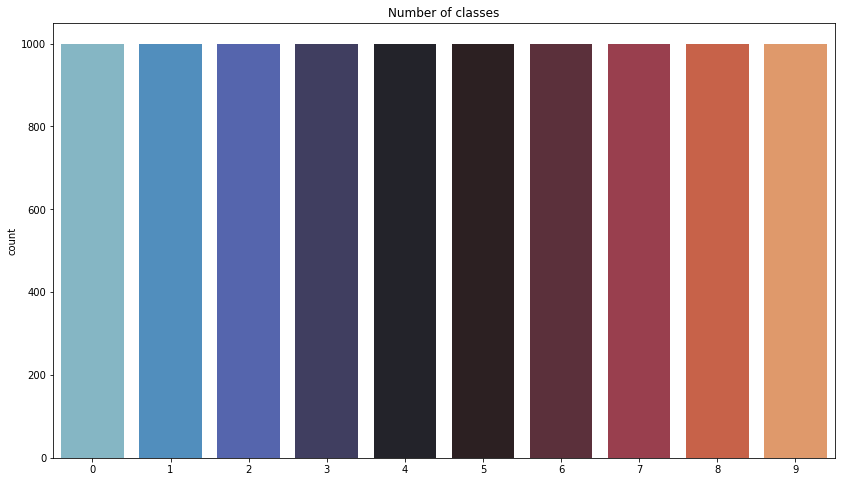

In [11]:
plt.figure(figsize=(14,8))
sns.countplot(Y_test, palette="icefire")
plt.title("Number of classes")
plt.show()

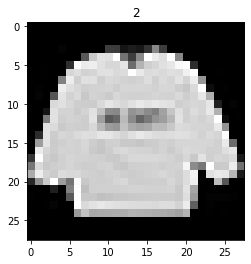

In [12]:
# plot some samples
plt.figure(figsize=(4,4))
plt.title(Y_train[0])
plt.imshow(X_train.values.reshape(-1,28,28)[0],cmap="gray")

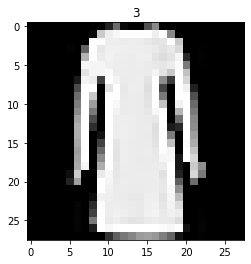

In [13]:
# plot some samples
plt.figure(figsize=(4,4))
plt.title(Y_train[17])
plt.imshow(X_train.values.reshape(-1,28,28)[17],cmap="gray")

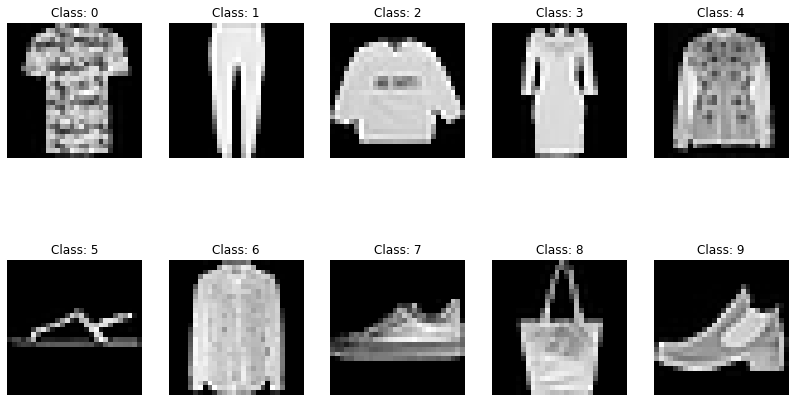

In [14]:
plt.figure(figsize = (14,8))

for i in range(10):
    plt.subplot(2, 5, i+1)
    img = train[train.label == i].iloc[0, 1:].values
    img = img.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.title("Class: " + str(i))
    plt.axis('off')
    
plt.show()

### Normalization, Reshape and Label Encoding

#### ==> Normalization
##### .We perform a grayscale normalization to reduce the effect of illumination's differences.
##### .If we perform normalization, CNN works faster.

In [16]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (60000, 784)
X_test shape:  (10000, 784)


In [17]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


#### Reshaping
##### Train and test images (28 x 28)
##### We reshape all data to 28x28x1 3D matrices.
##### Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.

In [18]:
# Reshaping
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)


#### Label Encoding
##### Encode labels to one hot vectors
##### 2 => [0,0,1,0,0,0,0,0,0,0]
##### 4 => [0,0,0,0,1,0,0,0,0,0]

In [19]:
# Label Encoding (be careful! run just once!)
from keras.utils.np_utils import to_categorical 

# convert to one-hot-encoding(one hot vectors)
Y_train = to_categorical(Y_train, num_classes = 10)
# convert to one-hot-encoding(one hot vectors)
Y_test = to_categorical(Y_test, num_classes = 10)

print(Y_train.shape)
print(Y_test.shape)

Using TensorFlow backend.


(60000, 10)
(10000, 10)


### Train-Test Split

##### We split the data into train and test sets.
##### test size is 10%.
##### train size is 90%.

In [20]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 2)
print("x_train shape: ",x_train.shape)
print("x_val shape: ",x_val.shape)
print("y_train shape: ",y_train.shape)
print("y_val shape :",y_val.shape)

x_train shape:  (54000, 28, 28, 1)
x_val shape:  (6000, 28, 28, 1)
y_train shape:  (54000, 10)
y_val shape : (6000, 10)


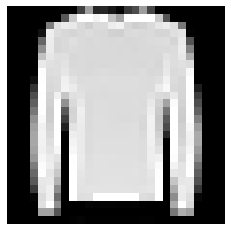

In [21]:
# Some examples
plt.imshow(x_train[4].reshape(28,28),cmap="gray")
plt.axis("off")
plt.show()

# Convolutional Neural Network


### Implementing with Keras

In [23]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix

from keras.models import Sequential, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

model = Sequential()

#1. LAYER
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

#2. LAYER
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D(pool_size=(2, 2)))

#3. LAYER
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

#4. LAYER
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D(pool_size=(2, 2)))

#FULLY CONNECTED LAYER
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))

#OUTPUT LAYER
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
__________

#### Define Optimizer
##### Adam optimizer: Change the learning rate

In [25]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [26]:
# # Define the optimizer
# optimizer = RMSprop(lr = 0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [27]:
# Compile the model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

#### Epochs and Batch Size

In [28]:
epochs = 50 # for better result increase the epochs
batch_size = 100

#### Data Augmentation

In [29]:
# Data Augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.1,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

#### Fit the Model

In [30]:
# # save the best weights
# checkpointer = ModelCheckpoint(filepath="best_weights/fashion_mnist_model.h5", verbose=1, save_best_only=True)

In [31]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                              shuffle=True, #veriler random gelip eğitilir
                              epochs=epochs, validation_data = (x_val, y_val),
                              verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size)
#                               callbacks=[checkpointer]) #we save the best weights with checkpointer

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
 - 583s - loss: 0.5017 - acc: 0.8139 - val_loss: 0.3853 - val_acc: 0.8572
Epoch 2/50
 - 570s - loss: 0.3535 - acc: 0.8672 - val_loss: 0.2687 - val_acc: 0.8998
Epoch 3/50
 - 570s - loss: 0.3130 - acc: 0.8826 - val_loss: 0.3150 - val_acc: 0.8800
Epoch 4/50
 - 581s - loss: 0.2939 - acc: 0.8903 - val_loss: 0.2293 - val_acc: 0.9133
Epoch 5/50
 - 610s - loss: 0.2700 - acc: 0.9010 - val_loss: 0.2296 - val_acc: 0.9160
Epoch 6/50
 - 559s - loss: 0.2560 - acc: 0.9054 - val_loss: 0.2476 - val_acc: 0.9067
Epoch 7/50
 - 545s - loss: 0.2459 - acc: 0.9080 - val_loss: 0.2309 - val_acc: 0.9157
Epoch 8/50
 - 555s - loss: 0.2360 - acc: 0.9128 - val_loss: 0.2213 - val_acc: 0.9202
Epoch 9/50
 - 565s - loss: 0.2280 - acc: 0.9159 - val_loss: 0.2184 - val_acc: 0.9222
Epoch 10/50
 - 550s - loss: 0.2221 - acc: 0.9177 - val_loss: 0.2156 - val_acc: 0.9193
Epoch 11/50
 - 588s - loss: 0.2152 - acc: 0.9208 - val_loss: 0.2433 - val_acc: 0.9107
Epoch 12/50
 - 

In [46]:
# # save model to json
model_json = model.to_json() #fashion_mnist_model.h5 - I saved the file in JSON format.
with open("savedModel/fashion_mnist_model.json", "w") as json_file:json_file.write(model_json)

In [33]:
# # load the best weights which we saved
# model_best = load_model("../yourPath/fashion_mnist_model.h5")

#### Evaluate the model
##### Validation and Loss visualization

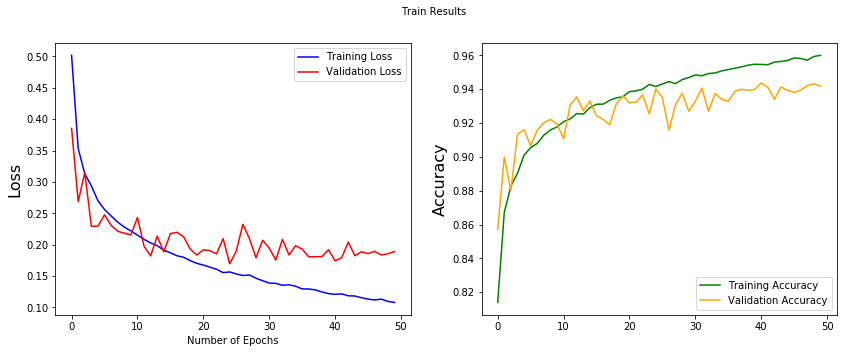

In [34]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['acc'], color='green', label='Training Accuracy')
plt.plot(history.history['val_acc'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [35]:
print('Train accuracy of the model: ',history.history['acc'][-1])

Train accuracy of the model:  0.9600185222095914


In [36]:
print('Train loss of the model: ',history.history['loss'][-1])

Train loss of the model:  0.10798911917264815


In [37]:
print('Validation accuracy of the model: ',history.history['val_acc'][-1])

Validation accuracy of the model:  0.9418333381414413


In [38]:
print('Validation loss of the model: ',history.history['val_loss'][-1])

Validation loss of the model:  0.1890391470864415


In [39]:
score = model.evaluate(X_test,Y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.17742450388632713
Test Accuracy: 0.9424


#### Predict For Random Sample

(10000, 28, 28, 1)


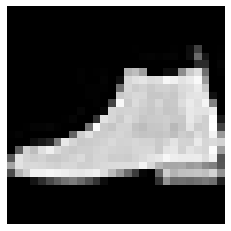

In [40]:
print(X_test.shape)
plt.imshow(X_test[100].reshape(28,28),cmap="gray")
plt.axis("off")
plt.show()

In [41]:
trueY = Y_test[100]
img = X_test[100]
test_img = img.reshape(1,28,28,1)

preds = model.predict_classes(test_img)
prob = model.predict_proba(test_img)

print("trueY: ",np.argmax(trueY))#içlerinden en yüksek olan değeri seçer
print("Preds: ",preds)
print("Prob: ",prob)

trueY:  9
Preds:  [9]
Prob:  [[1.5434242e-12 2.6375679e-13 1.1677975e-10 5.0251405e-13 1.7551462e-10
  1.9083883e-08 4.4489953e-10 9.6839408e-09 8.9097937e-11 1.0000000e+00]]


#### Confusion Matrix

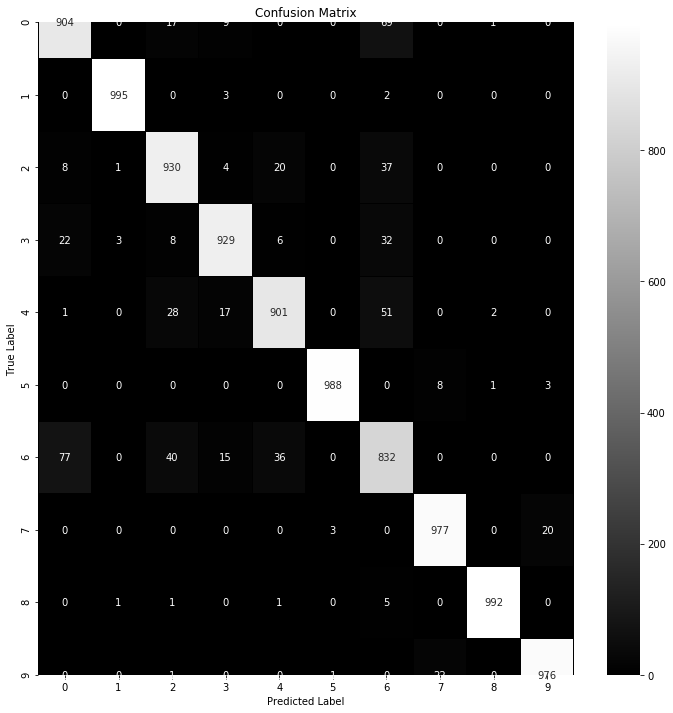

In [43]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(Y_test, axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [44]:
for i in range(len(confusion_mtx)):
    print("Class:",str(i))
    print("Number of Wrong Prediction:", str(sum(confusion_mtx[i])-confusion_mtx[i][i]), "out of 1000")
    print("Percentage of True Prediction: {:.2f}%".format(confusion_mtx[i][i] / 10))
    print("***********************************************************")

Class: 0
Number of Wrong Prediction: 96 out of 1000
Percentage of True Prediction: 90.40%
***********************************************************
Class: 1
Number of Wrong Prediction: 5 out of 1000
Percentage of True Prediction: 99.50%
***********************************************************
Class: 2
Number of Wrong Prediction: 70 out of 1000
Percentage of True Prediction: 93.00%
***********************************************************
Class: 3
Number of Wrong Prediction: 71 out of 1000
Percentage of True Prediction: 92.90%
***********************************************************
Class: 4
Number of Wrong Prediction: 99 out of 1000
Percentage of True Prediction: 90.10%
***********************************************************
Class: 5
Number of Wrong Prediction: 12 out of 1000
Percentage of True Prediction: 98.80%
***********************************************************
Class: 6
Number of Wrong Prediction: 168 out of 1000
Percentage of True Prediction: 83.20%
**********